# Diabetes Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
#Importing the data
data_measures = pd.read_csv('weight-height.csv')
data_measures.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


<Axes: xlabel='Height', ylabel='Weight'>

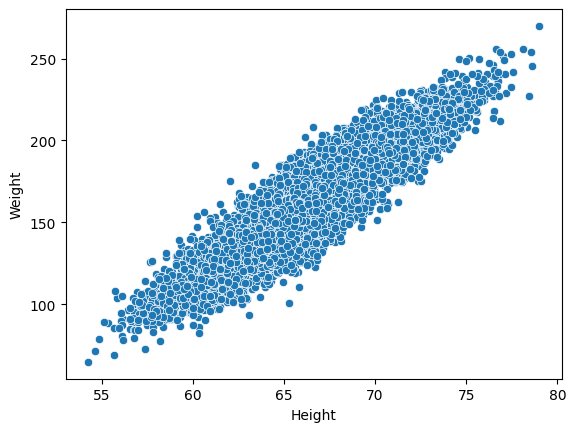

In [6]:
sns.scatterplot(data=data_measures, y='Weight', x='Height')

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

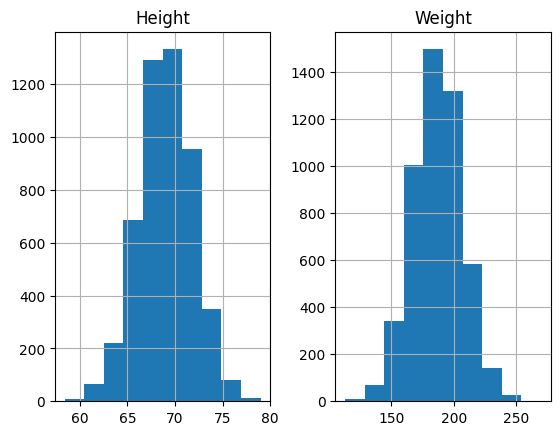

In [7]:
males = data_measures[data_measures['Gender'] == 'Male']
females = data_measures[data_measures['Gender'] == 'Female']
males.hist()

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

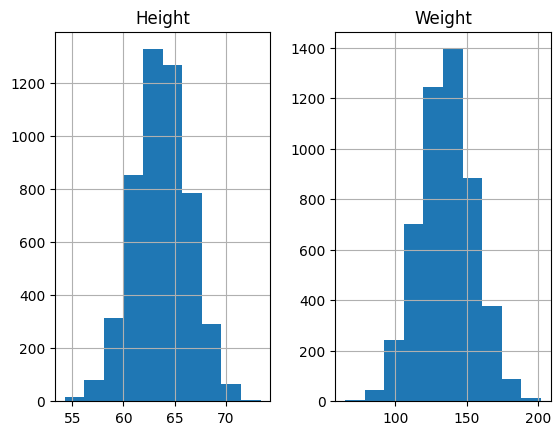

In [8]:
females.hist()

In [9]:
data_measures.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
data_measures.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
data_measures['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

# Analysis with all the variables
Trying to predict the gender which height and weight as data

In [11]:
X = data_measures.drop('Gender', axis=1)
Y = data_measures['Gender']

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y.values)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [14]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
predictions = classifier.predict(x_test)

<Axes: >

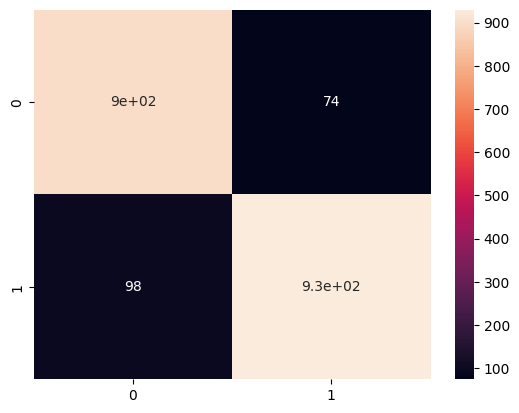

In [16]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [17]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.914

# Analysis of only height

In [18]:
X = data_measures['Height'].astype('float')
Y = data_measures['Gender']

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y.values)

X = np.array(X)
Y = np.array(Y)
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)

# reshaping the array from (500,) to (500, 1)
Y = Y.reshape(-1,1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [20]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

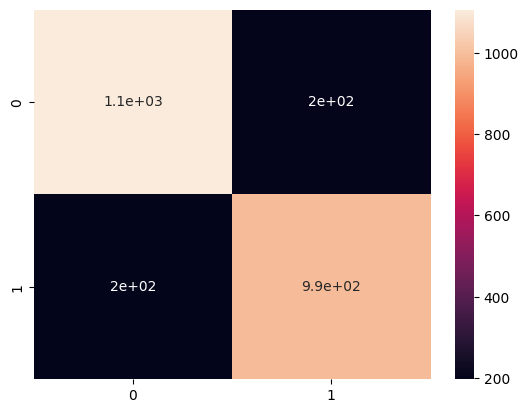

In [21]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [22]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.84

## There is less accuracy when the analysis takes only glucose as a variables